In [1]:
from google.colab import drive
drive.mount('/content/Mydrive/')

Mounted at /content/Mydrive/


In [2]:
import numpy as np


def get_vectors(embeddings, words):
    """
    Input:
        embeddings: a word
        fr_embeddings:
        words: a list of words
    Output:
        X: a matrix where the rows are the embeddings corresponding to the rows on the list

    """
    m = len(words)
    X = np.zeros((1, 300))
    for word in words:
        english = word
        eng_emb = embeddings[english]
        X = np.row_stack((X, eng_emb))
    X = X[1:,:]
    return X

In [3]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [4]:
%cd '/content/Mydrive/MyDrive/MHoseinAdibeig/NLP'

/content/Mydrive/MyDrive/MHoseinAdibeig/NLP


In [5]:
data = pd.read_csv('capitals.txt', delimiter=' ')
data.columns = ['city1', 'country1', 'city2', 'country2']

# print first five elements in the DataFrame
data.head(5)

,city1,country1,city2,country2
0,Athens,Greece,Bangkok,Thailand
1,Athens,Greece,Beijing,China
2,Athens,Greece,Berlin,Germany
3,Athens,Greece,Bern,Switzerland
4,Athens,Greece,Cairo,Egypt


In [6]:
word_embeddings = pickle.load(open("word_embeddings_subset.p", "rb"))
len(word_embeddings)

243

Each of the word embedding is a 300-dimensional vector.

In [7]:
print("dimension: {}".format(word_embeddings['Spain'].shape[0]))

dimension: 300


In [8]:
word_embeddings['Spain']

array([ 3.14941406e-02, -1.82617188e-01,  1.63085938e-01,  1.24511719e-01,
       -1.85546875e-02, -1.73828125e-01, -1.21093750e-01, -1.32812500e-01,
       -1.25000000e-01,  2.45117188e-01, -2.18750000e-01,  4.29687500e-02,
        1.66015625e-01, -1.14746094e-01, -7.37304688e-02,  2.81982422e-02,
        7.71484375e-02,  1.39648438e-01,  1.06445312e-01,  3.98437500e-01,
        3.18359375e-01, -3.34472656e-02,  3.80859375e-02,  2.15820312e-01,
       -3.93676758e-03,  4.95605469e-02, -1.81640625e-01, -1.77734375e-01,
       -2.17773438e-01,  2.28515625e-01,  1.47460938e-01,  2.80761719e-02,
        4.08935547e-03, -9.32617188e-02, -1.15722656e-01, -1.01318359e-02,
       -3.69140625e-01, -1.53320312e-01,  6.07910156e-02,  1.50146484e-02,
        1.42578125e-01,  4.63867188e-03,  7.12890625e-02,  2.69531250e-01,
        1.96289062e-01,  6.73828125e-02,  1.64794922e-03, -7.61718750e-02,
       -8.15429688e-02,  2.51953125e-01, -1.38671875e-01,  2.61718750e-01,
        1.13525391e-02, -

**Predict relationships among words**

Now you will write a function that will use the word embeddings to predict relationships among words.

The function will take as input three words.

The first two are related to each other.

It will predict a 4th word which is related to the third word in a similar manner as the two first words are related to each other.

As an example, "Athens is to Greece as Bangkok is to ______"?

You will write a program that is capable of finding the fourth word.

We will give you a hint to show you how to compute this.


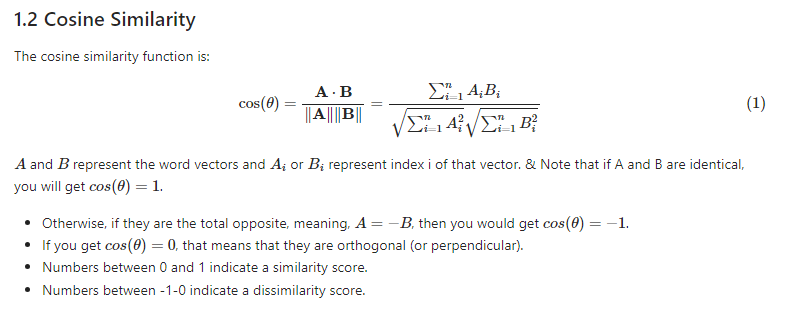

In [35]:
def cosine_similarity(A, B):
    '''
    Input:
        A: a numpy array which corresponds to a word vector
        B: A numpy array which corresponds to a word vector
    Output:
        cos: numerical number representing the cosine similarity between A and B.
    '''

    dot = np.dot(A, B)
    # norma = np.sqrt(np.dot(A,A))
    # normb = np.sqrt(np.dot(B,B))
    norma = np.linalg.norm(A)
    normb = np.linalg.norm(B)
    cos = dot/(norma * normb)

    return cos

In [31]:
# feel free to try different words
king = word_embeddings['king']
queen = word_embeddings['queen']

cosine_similarity(king, queen)


0.6510956

** Euclidean distance**

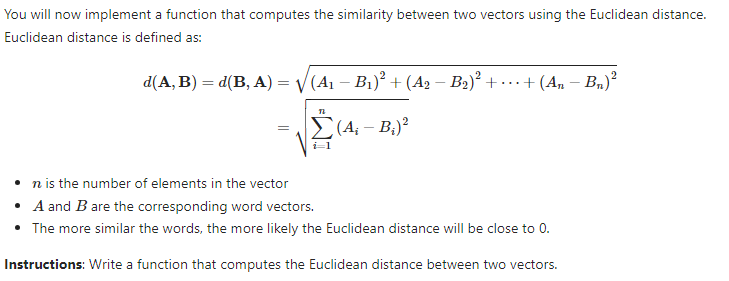


In [11]:
def euclidean(A, B):
    """
    Input:
        A: a numpy array which corresponds to a word vector
        B: A numpy array which corresponds to a word vector
    Output:
        d: numerical number representing the Euclidean distance between A and B.
    """
    d = np.linalg.norm(A - B)

    return d


In [12]:
# Test your function
euclidean(king, queen)

2.4796925

**Finding the country of each capital**

We will use the previous functions to compute similarities between vectors, and use these to find the capital cities of countries. You will write a function that takes in three words, and the embeddings dictionary. Your task is to find the capital cities. For example, given the following words:

1: Athens 2: Greece 3: Baghdad,
your task is to predict the country 4: Iraq.

To predict the capital you might want to look at the King - Man + Woman = Queen example above, and implement that scheme into a mathematical function, using the word embeddings and a similarity function.

Iterate over the embeddings dictionary and compute the cosine similarity score between your vector and the current word embedding.

In [33]:
def get_country(city1, country1, city2, embeddings):
    """
    Input:
        city1: a string (the capital city of country1)
        country1: a string (the country of capital1)
        city2: a string (the capital city of country2)
        embeddings: a dictionary where the keys are words and values are their embeddings
    Output:
        countries: a dictionary with the most likely country and its similarity score
    """
    group = set((city1, country1, city2))

    # Get embedding of city 1
    city1_emb = embeddings[city1]

    # Get embedding of country 1
    country1_emb = embeddings[country1]

    # Get embedding of city 2
    city2_emb = embeddings[city2]

    # get embedding of country 2 (it's a combination of the embeddings of country 1, city 1 and city 2)
    # Remember: King - Man + Woman = Queen
    vec = country1_emb - city1_emb + city2_emb

    # Initialize the similarity to -1 (it will be replaced by a similarities that are closer to +1)
    similarity = -1

    # initialize country to an empty string
    country = ''

    # loop through all words in the embeddings dictionary
    for word in embeddings.keys():

      # First Check  that the word is not already in the 'group'
      if word not in group:

        # Get the word embedding
        word_emb = embeddings[word]

        # Calculate cosine similarity between embedding of country 2 and the word in the embeddings dictionary
        cur_similarity = cosine_similarity(vec, word_emb)

        # if the cosine similarity is more similar than the previously best similarity...
        if cur_similarity > similarity:
          similarity = cur_similarity

          country = (word, similarity)

    return country

In [34]:
# Testing your function, note to make it more robust you can return the 5 most similar words.
get_country('Athens', 'Greece', 'Cairo', word_embeddings)

('Egypt', 0.7626821)

**Model Accuracy**

Accuracy = Correct # of predictions / Total # of predictions

In [37]:
def get_accuracy(word_embeddings, data):
    '''
    Input:
        word_embeddings: a dictionary where the key is a word and the value is its embedding
        data: a pandas dataframe containing all the country and capital city pairs

    Output:
        accuracy: the accuracy of the model
    '''
    num_correct = 0

    # Loop through the rows of the dataframe
    for i , row in data.iterrows():

      # Get city1
      city1 = row[0]

      # Get country 1
      country1 = row[1]

      # Get city2
      city2 = row[2]

      # Get country2
      country2 = row[3]

      # Use get_country to find the predicted country2
      predicted_country2, _ = get_country(city1, country1, city2, word_embeddings)

      # If the predicted country2 id the same as the actual country2
      if predicted_country2 == country2:
        num_correct += 1

    # Get the number of rows in data dataframe
    m = len(data)

    # Calculate the accuracy by dividing the number correct by m

    accuracy = num_correct / m

    return accuracy




In [38]:
accuracy = get_accuracy(word_embeddings, data)
print(f"Accuracy is {accuracy:.2f}")

Accuracy is 0.92


**Plotting the vectors using PCA**

You can think of PCA as a method that projects our vectors in a space of reduced dimension, while keeping the maximum information about the original vectors in their reduced counterparts. In this case, by maximum infomation we mean that the Euclidean distance between the original vectors and their projected siblings is minimal. Hence vectors that were originally close in the embeddings dictionary, will produce lower dimensional vectors that are still close to each other.

Before plotting the words, you need to first be able to reduce each word vector with PCA into 2 dimensions and then plot it. The steps to compute PCA are as follows:

1. Mean normalize the data

2. Compute the covariance matrix of your data

3. Compute the eigenvectors and the eigenvalues of your covariance matrix

4. Multiply the first K eigenvectors by your normalized data. The transformation should look something as follows:


In [39]:
def compute_pca(X, n_components = 2):

    """
    Input:
        X: of dimension (m,n) where each row corresponds to a word vector
        n_components: Number of components you want to keep.
    Output:
        X_reduced: data transformed in 2 dims/columns + regenerated original data
    """

    # Mean center the data
    X_demeaned = X - np.mean(X, axis = 0)

    # Calculate the covariance matrix
    covariance_matrix = np.cov(X_demeaned, rowvar = False)

    # Calculate eigenvectors & eigenvalues of the covariance matrix
    eigen_vals, eigen_vecs = np.linalg.eigh(covariance_matrix, UPLO='L')

    # Sort eigenvalue in increasing order
    idx_sorted = np.argsort(eigen_vals)

    # Reverse the order so that it's from highest to lowest
    idx_sorted_decreasing = idx_sorted[::-1]

    # Sort the eigen values by idx_sorted_decreasing
    eigen_vals_sorted = eigen_vals[idx_sorted_decreasing]

    # Sort eigenvectors using by idx_sorted_decreasing indices
    eigen_vecs_sorted = eigen_vecs[:, idx_sorted_decreasing]


    # Select the first n eigenvectors
    eigen_vecs_subset = eigen_vecs_sorted[:,0:n_components]

    # transform the data by multiplying the transpose of the eigenvectors
    # with the transpose of the de-meaned data
    # Then take the transpose of that product.
    X_reduced = np.dot(eigen_vecs_subset.transpose(),X_demeaned.transpose()).transpose()

    return X_reduced

In [40]:
# Testing your function
np.random.seed(1)
X = np.random.rand(3, 10)
X_reduced = compute_pca(X, n_components=2)
print("Your original matrix was " + str(X.shape) + " and it became:")
print(X_reduced)

Your original matrix was (3, 10) and it became:
[[ 0.43437323 -0.49820384]
 [ 0.42077249  0.50351448]
 [-0.85514571 -0.00531064]]


Now you will use your pca function to plot a few words we have chosen for you. You will see that similar words tend to be clustered near each other. Sometimes, even antonyms tend to be clustered near each other. Antonyms describe the same thing but just tend to be on the other end of the scale They are usually found in the same location of a sentence, have the same parts of speech, and thus when learning the word vectors, you end up getting similar weights. In the next week we will go over how you learn them, but for now let's just enjoy using them.

In [26]:
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town',
         'village', 'country', 'continent', 'petroleum', 'joyful']

# given a list of words and the embeddings, it returns a matrix with all the embeddings
X = get_vectors(word_embeddings, words)

print('You have 11 words each of 300 dimensions thus X.shape is:', X.shape)

You have 11 words each of 300 dimensions thus X.shape is: (11, 300)


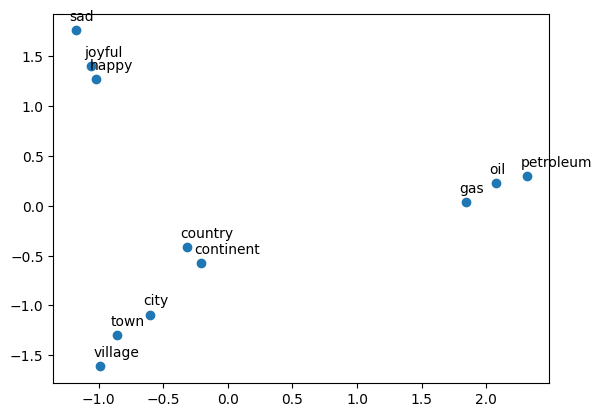

In [27]:
# We have done the plotting for you. Just run this cell.
result = compute_pca(X, 2)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0] - 0.05, result[i, 1] + 0.1))

plt.show()